In [39]:
import csv
import numpy as np
import pandas as pd
import json
import matplotlib as plt

In [6]:
source = './data/2019-combined.csv'

In [11]:
df = pd.read_csv(source)
print(df.head())

        State  Education Budget  Unemployment Rate  Population Estimate  \
0     Alabama      2.775338e+09                3.2              4903185   
1      Alaska      4.005232e+08                5.6               731545   
2     Arizona      5.143402e+09                4.8              7278717   
3    Arkansas      1.350409e+09                3.5              3017804   
4  California      1.721222e+10                4.1             39512223   

   SNAPS household_participants  SNAPS individual_participants  SNAPS cost  \
0                        315551                         667043  1032064886   
1                         35493                          78932   171091672   
2                        345106                         736883  1146712214   
3                        159231                         354917   460333605   
4                       1803402                        3529470  5977281299   

   SNAPS cost_per_person  SNAPS cost_per_household  
0                 272.56   

In [14]:
df['Education Budget by Population'] = df['Education Budget'] / df['Population Estimate']
df['SNAPS Cost by Population'] = df['SNAPS cost'] / df['Population Estimate']


<Axes: title={'center': 'Education Budget and SNAPS Cost by Population (2019)'}, xlabel='Education Budget by Population', ylabel='SNAPS Cost by Population'>

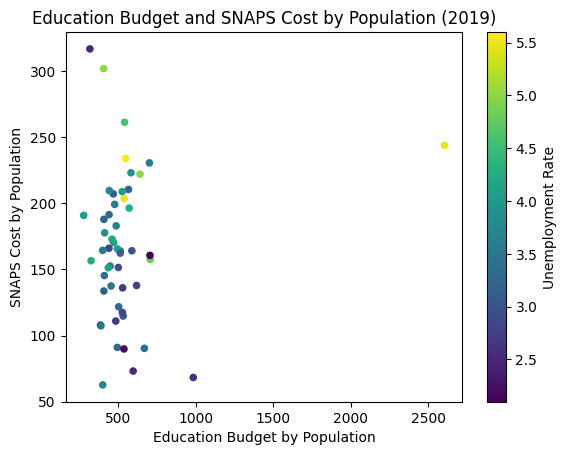

In [23]:
df.plot.scatter('Education Budget by Population', 'SNAPS Cost by Population', c='Unemployment Rate', colormap='viridis', title="Education Budget and SNAPS Cost by Population (2019)")

<Axes: title={'center': 'Population vs SNAPS Money Spent by State (2019)'}, xlabel='Population Estimate', ylabel='SNAPS cost'>

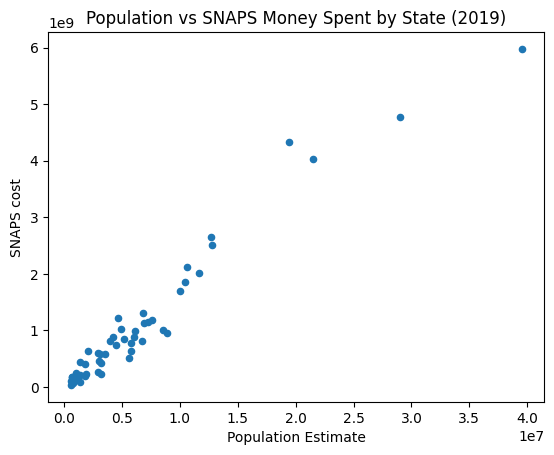

In [26]:
df.plot.scatter('Population Estimate', 'SNAPS cost', title="Population vs SNAPS Money Spent by State (2019)")

<Axes: xlabel='State'>

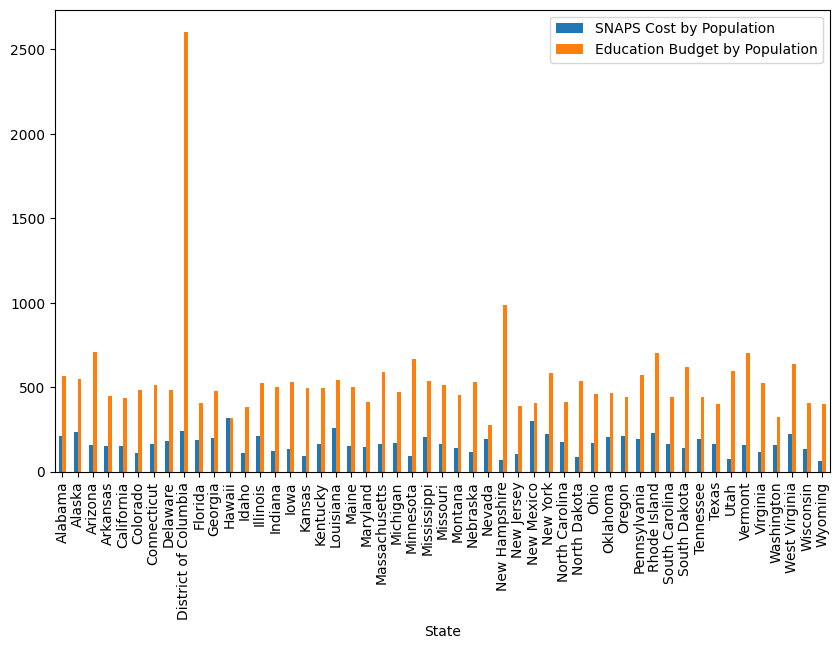

In [41]:
df2 = df[['State', 'SNAPS Cost by Population', 'Education Budget by Population']].set_index("State")
df2.plot.bar(figsize=(10,6))  #('State', 'SNAPS Cost by Population', 'Education Budget by Population', rot=0)

# DOING ANALYSIS ACROSS DIFFERENT YEARS NOW

In [45]:
years = ['2015', '2016', '2017', '2018', '2019']
data = {}

In [59]:
for year in years:
    source = f'./data/{year}-combined.csv'
    combined = pd.read_csv(source)
    combined_dict =  df.to_dict('records')
    data[year] = combined_dict

{'2015': [{'State': 'Alabama', 'Education Budget': 2775338135.0, 'Unemployment Rate': 3.2, 'Population Estimate': 4903185, 'SNAPS household_participants': 315551, 'SNAPS individual_participants': 667043, 'SNAPS cost': 1032064886, 'SNAPS cost_per_person': 272.56, 'SNAPS cost_per_household': 128.94, 'Education Budget by Population': 566.0276198022306, 'SNAPS Cost by Population': 210.48866930372807}, {'State': 'Alaska', 'Education Budget': 400523164.6, 'Unemployment Rate': 5.6, 'Population Estimate': 731545, 'SNAPS household_participants': 35493, 'SNAPS individual_participants': 78932, 'SNAPS cost': 171091672, 'SNAPS cost_per_person': 401.7, 'SNAPS cost_per_household': 180.63, 'Education Budget by Population': 547.5031127271733, 'SNAPS Cost by Population': 233.8771668181725}, {'State': 'Arizona', 'Education Budget': 5143402498.0, 'Unemployment Rate': 4.8, 'Population Estimate': 7278717, 'SNAPS household_participants': 345106, 'SNAPS individual_participants': 736883, 'SNAPS cost': 11467122